In [3]:
# Importing Dependencies
import pandas as pd
import requests
from bs4 import BeautifulSoup
import Links as ls
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

NameError: name 'ls' is not defined

In [20]:
# Importing Batting URLs
# print(ls.Team_Batting_2007_url)

In [21]:
# url = ls.Team_Batting_2024_url
# response= requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')
# tb = soup.find("table",id='team_batting')
# df = pd.read_html(str(tb))[0]
# df.head(5)

In [22]:
# url = ls.Team_Batting_2007_url
# response= requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')
# tb = soup.find("table",id='team_batting')
# df = pd.read_html(str(tb))[0]
# df.head(21)


In [23]:
# Defining a function to pull information from batting tables into a pandas dataframe.

def get_batting_table(x,y):
    """
    Retrieves and parses an HTML table from a specified URL.

    Parameters:
    - x (str): URL of the webpage containing the HTML table.
    - y (str): ID of the HTML table to be extracted from the webpage.

    Returns:
    - df (pandas dataframe): Cleaned and processed DataFrame containing numeric data from the 
        specified HTML table.
    
    This function performs the following steps:
    1. Sends a GET request to the provided URL.
    2. Parses the HTML content using BeautifulSoup.
    3. Finds the table element with the specified ID.
    4. Converts the HTML table into a pandas DataFrame using pd.read_html().
    5. Converts numeric columns (excluding 'Pos' and 'Name') to numeric type.
    6. Drops rows with any NaN values.
    7. Returns the cleaned DataFrame.
    """

    
    # Finding the table with the specified url (x) and id (y)
    response=requests.get(x)
    soup= BeautifulSoup(response.content, 'html.parser')
    s = soup.find("table",id=y)
    # Converting html to a pandas dataframe
    df = pd.read_html(str(s))[0]
    
    # Convert columns to numeric type, ignoring Position (POS) and Name (Name) which should remain strings. 
    for col in df.columns:
        if col == "Pos":
            pass
        elif col == "Name":
            pass
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # Dropping rows with NaN values as those columns were repeat column headers.        
    df.dropna(inplace=True)
    # Returning the df created for use outside of the function.
    return df


In [24]:
# Using the get_batting_table function to pull in the batting table from the Links (ls) file.

batting_2007= get_batting_table(ls.Team_Batting_2007_url,"team_batting")
batting_2024=get_batting_table(ls.Team_Batting_2024_url,"team_batting")
# batting_2007.dtypes

C:\Users\cassy\AppData\Local\Temp\ipykernel_17832\1573439956.py:31: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(s))[0]
C:\Users\cassy\AppData\Local\Temp\ipykernel_17832\1573439956.py:31: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(s))[0]


In [25]:
# Pulling the active roster for both years
batting_2007=batting_2007.head(21)
batting_2024=batting_2024.head(21)

AttributeError: 'Axes' object has no attribute 'savefig'

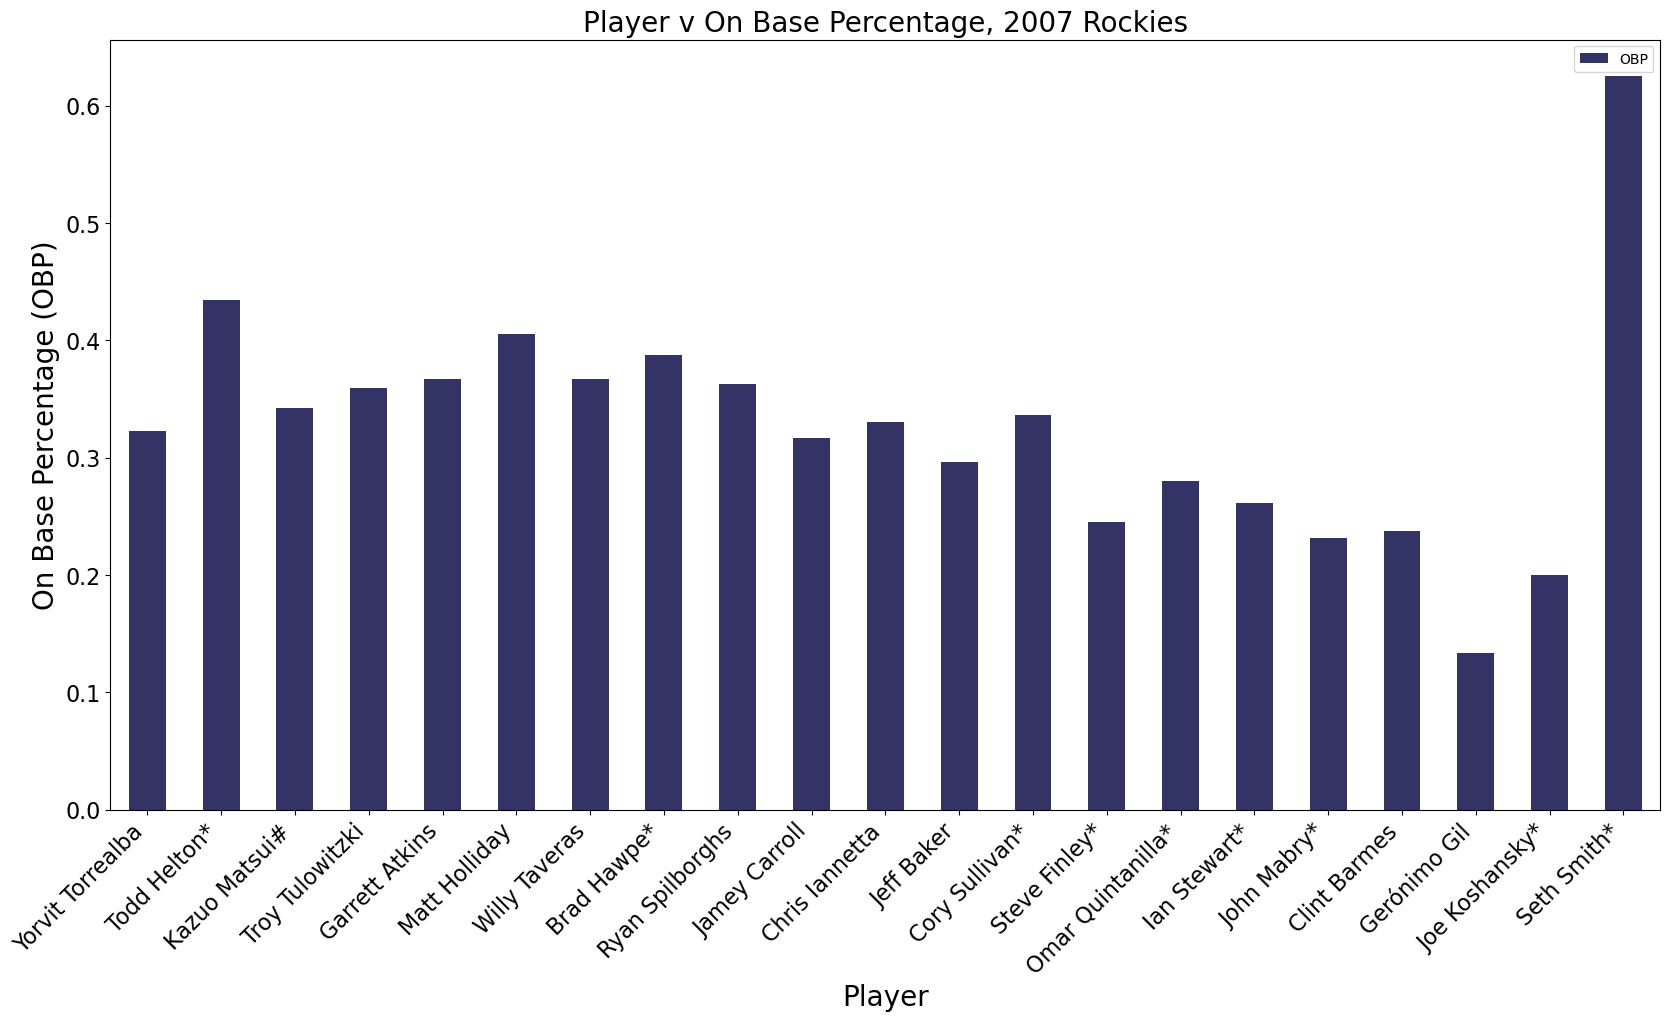

In [83]:
# Plotting the '07 batting data in a bar chart to view players and their on base percentage.
batting_fig1=batting_2007.plot(x="Name",
                  y="OBP",
                  kind="bar",                  
                  figsize= [20,10],
                  fontsize=16,
                  color=ls.Rockies_Purple_Hex)
batting_fig1.set_ylabel('On Base Percentage (OBP)', fontsize=20)
batting_fig1.set_xlabel('Player', fontsize=20,)
batting_fig1.set_title("Player v On Base Percentage, 2007 Rockies", fontsize=20)
batting_fig1.set_xticklabels(batting_fig1.get_xticklabels(), rotation=45, ha='right')



[Text(0, 0, 'Elias Díaz'),
 Text(1, 0, 'Elehuris Montero'),
 Text(2, 0, 'Brendan Rodgers'),
 Text(3, 0, 'Ezequiel Tovar'),
 Text(4, 0, 'Ryan McMahon*'),
 Text(5, 0, 'Nolan Jones* (10-day IL)'),
 Text(6, 0, 'Brenton Doyle'),
 Text(7, 0, 'Jake Cave*'),
 Text(8, 0, 'Charlie Blackmon*'),
 Text(9, 0, 'Michael Toglia#'),
 Text(10, 0, 'Jacob Stallings'),
 Text(11, 0, 'Hunter Goodman'),
 Text(12, 0, 'Sean Bouchard'),
 Text(13, 0, 'Kris Bryant (10-day IL)'),
 Text(14, 0, 'Jordan Beck (10-day IL)'),
 Text(15, 0, 'Alan Trejo'),
 Text(16, 0, 'Adael Amador# (40-man)'),
 Text(17, 0, 'Sam Hilliard*'),
 Text(18, 0, 'Aaron Schunk'),
 Text(19, 0, 'Greg Jones# (40-man)')]

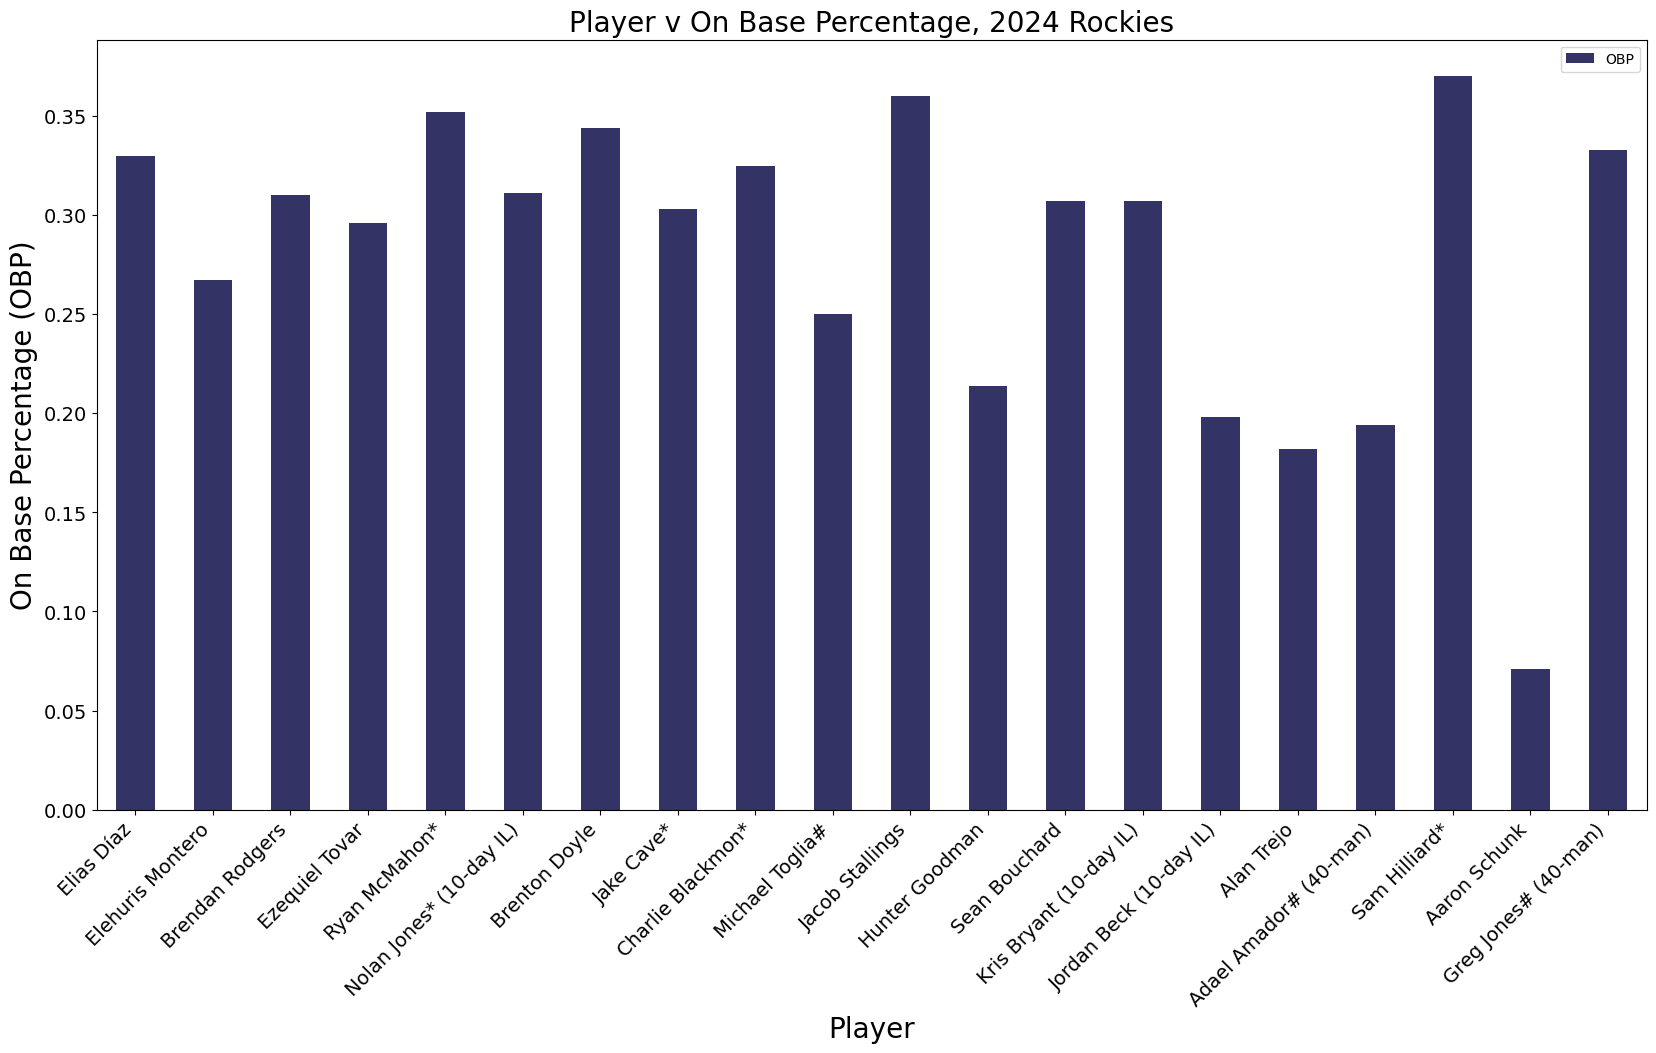

In [27]:
# Plotting the '24 batting data in a bar chart to view players and their on base percentage.
batting_fig2=batting_2024.plot(x="Name",
                  y="OBP",
                  kind="bar",
                  figsize= [20,10],
                  fontsize=14,
                  color=ls.Rockies_Purple_Hex)
batting_fig2.set_ylabel('On Base Percentage (OBP)', fontsize=20)
batting_fig2.set_xlabel('Player', fontsize=20,)
batting_fig2.set_title("Player v On Base Percentage, 2024 Rockies", fontsize=20)
batting_fig2.set_xticklabels(batting_fig2.get_xticklabels(), rotation=45, ha='right')

In [28]:
# Finding and printing the on base percentage average between the two years
print(f"The average On Base Percentage for 2007 was {batting_2007['OBP'].mean():,.2f},\n" 
      f"while in 2024, the On Base Percentage is {batting_2024['OBP'].mean():,.2f}.")

The average On Base Percentage for 2007 was 0.33,
while in 2024, the On Base Percentage is 0.28.


In [77]:
# Prepping the data to be concatnated.

#Adding a column to signal which year the data is from and making sure that both columns were added correctly.

batting_2007["Year"]=2007
batting_2024["Year"]=2024

# Verification methods
# display(batting_2007.head(3))
# display(batting_2007.columns)
# display(batting_2007.dtypes)
# display(batting_2024.head(3))
# display(batting_2024.columns)
# display(batting_2024.dtypes)

In [37]:
# Concatnating the data on index.
batting_2007=batting_2007.reset_index(drop=True)
batting_2024=batting_2024.reset_index(drop=True)
batting_combined=pd.concat([batting_2007,batting_2024])
display(batting_combined.head(5))
display(batting_combined.tail(5))


,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Year
0,1.0,C,Yorvit Torrealba,28.0,113.0,443.0,396.0,47.0,101.0,22.0,...,0.376,0.699,76.0,149.0,19.0,6.0,6.0,1.0,1.0,2007
1,2.0,1B,Todd Helton*,33.0,154.0,682.0,557.0,86.0,178.0,42.0,...,0.494,0.928,133.0,275.0,15.0,2.0,0.0,7.0,16.0,2007
2,3.0,2B,Kazuo Matsui#,31.0,104.0,453.0,410.0,84.0,118.0,24.0,...,0.405,0.746,87.0,166.0,1.0,0.0,8.0,1.0,1.0,2007
3,4.0,SS,Troy Tulowitzki,22.0,155.0,682.0,609.0,104.0,177.0,33.0,...,0.479,0.838,109.0,292.0,14.0,9.0,5.0,2.0,3.0,2007
4,5.0,3B,Garrett Atkins,27.0,157.0,684.0,605.0,83.0,182.0,35.0,...,0.486,0.853,113.0,294.0,16.0,2.0,0.0,10.0,3.0,2007


,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Year
15,16.0,2B,Alan Trejo,28.0,28.0,67.0,63.0,4.0,9.0,0.0,...,0.143,0.325,-9.0,9.0,2.0,1.0,1.0,0.0,0.0,2024
16,17.0,2B,Adael Amador# (40-man),21.0,10.0,36.0,35.0,1.0,6.0,1.0,...,0.200,0.394,8.0,7.0,1.0,0.0,0.0,0.0,0.0,2024
17,18.0,OF,Sam Hilliard*,30.0,14.0,28.0,24.0,7.0,7.0,1.0,...,0.583,0.954,156.0,14.0,0.0,0.0,1.0,0.0,0.0,2024
18,19.0,IF,Aaron Schunk,26.0,10.0,14.0,14.0,2.0,1.0,0.0,...,0.071,0.143,-61.0,1.0,0.0,0.0,0.0,0.0,0.0,2024
19,20.0,RF,Greg Jones# (40-man),26.0,6.0,6.0,5.0,1.0,1.0,0.0,...,0.800,1.133,197.0,4.0,0.0,0.0,0.0,0.0,0.0,2024


In [38]:
# Verifying concat worked and no columns were repeated incorrectly
batting_combined=batting_combined.drop(columns=["Name"])
print(batting_combined.columns)

Index(['Rk', 'Pos', 'Age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP',
       'HBP', 'SH', 'SF', 'IBB', 'Year'],
      dtype='object')


In [70]:
# Grouping the combined data frame by position. One for averages and one for sums.
grouped_df_pos_mean= batting_combined.groupby(["Pos","Year"]).mean().reset_index()
grouped_df_pos_mean.head(15)
grouped_df_pos_sum= batting_combined.groupby(["Pos","Year"]).sum().reset_index()
grouped_df_pos_sum.head(15)

,Pos,Year,Rk,Age,G,PA,AB,R,H,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1B,2007,22.0,58.0,171.0,697.0,569.0,86.0,179.0,43.0,...,0.634,0.661,1.295,127.0,277.0,15.0,2.0,0.0,8.0,16.0
1,1B,2024,12.0,50.0,117.0,435.0,393.0,47.0,77.0,11.0,...,0.517,0.748,1.265,141.0,143.0,11.0,1.0,0.0,6.0,0.0
2,2B,2007,28.0,89.0,239.0,796.0,707.0,135.0,185.0,37.0,...,0.939,0.991,1.928,187.0,254.0,6.0,4.0,14.0,4.0,2.0
3,2B,2024,36.0,76.0,116.0,409.0,384.0,38.0,91.0,16.0,...,0.686,0.731,1.418,89.0,127.0,10.0,2.0,1.0,1.0,1.0
4,3B,2007,21.0,49.0,192.0,730.0,648.0,86.0,191.0,39.0,...,0.628,0.858,1.486,170.0,310.0,16.0,4.0,0.0,10.0,3.0
5,3B,2024,5.0,29.0,94.0,403.0,355.0,48.0,97.0,21.0,...,0.352,0.451,0.802,118.0,160.0,7.0,2.0,0.0,2.0,2.0
6,C,2007,31.0,83.0,185.0,693.0,607.0,70.0,145.0,30.0,...,0.786,0.797,1.585,102.0,219.0,23.0,11.0,8.0,3.0,4.0
7,C,2024,12.0,67.0,117.0,429.0,386.0,38.0,107.0,23.0,...,0.690,0.831,1.521,214.0,159.0,18.0,7.0,1.0,3.0,2.0
8,CF,2007,43.0,121.0,309.0,963.0,870.0,132.0,255.0,36.0,...,1.311,1.498,2.807,305.0,347.0,13.0,11.0,8.0,8.0,3.0
9,CF,2024,7.0,26.0,91.0,373.0,329.0,54.0,91.0,16.0,...,0.344,0.465,0.809,119.0,153.0,9.0,3.0,4.0,4.0,1.0


In [71]:
# Defining a function that will make and return a pivot table based on inputs.
def make_batting_pivot(g_df,ind,col,val):
    """
    Create a pivot table from a DataFrame.

    Parameters:
    g_df (grouped pandas dataframe, variable): Input DataFrame to pivot.

    ind(str): Column name to use as the index (rows) in the pivot table.

    col (str): Column name to use as the columns in the pivot table.

    val (str): Column name to use for values in the pivot table.

    Returns:
        pivot_df: Pivot table dataframe.

    """
    pivot_df=g_df.pivot(index=ind,
                        columns=col,
                        values=val)
    return pivot_df

In [72]:
# Using the make_batting_pivot function to create a pivot for OBP
grouped_obp_piv=make_batting_pivot(g_df=grouped_df_pos_mean,
                                                  ind="Pos",
                                                  col="Year",
                                                  val="OBP")
grouped_obp_piv.head()

Year,2007,2024
Pos,,
1B,0.31700,0.258500
2B,0.31300,0.228667
3B,0.31400,0.352000
C,0.26200,0.345000
CF,0.32775,0.344000


In [73]:
# Making a dictionary to hold the rockies colors for viewing easier in a bar chart.
colors={2007:ls.Rockies_Purple_Hex,2024:ls.Rockies_Silver_Hex}

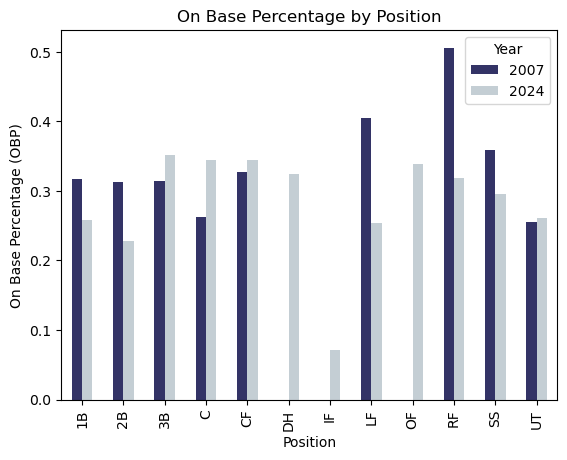

In [74]:
# Creating a bar chart to show OBP by position between the two years.
batting_fig3=grouped_obp_piv.plot(kind="bar",
                     color=colors,
                     xlabel="Position",
                     ylabel="On Base Percentage (OBP)",
                     title="On Base Percentage by Position")

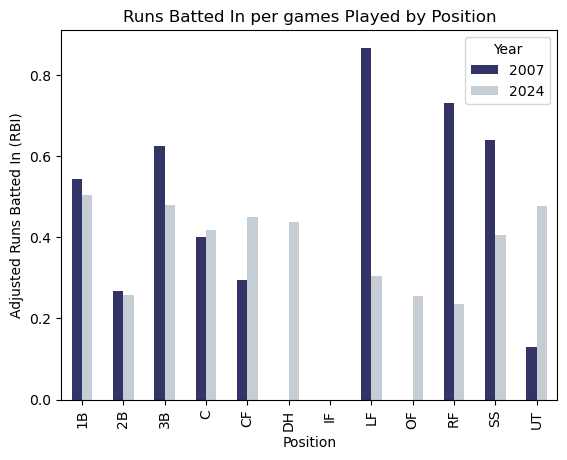

In [75]:
# Creating a new dataframe to plot RBIs.
rbi_grouped=grouped_df_pos_sum
# Adding a new row that adjusts the total RBIs based on the number of games played.
rbi_grouped["Adjusted RBI"]=rbi_grouped["RBI"]/rbi_grouped["G"]
grouped_rbi_piv=make_batting_pivot(g_df=rbi_grouped,
                                   ind="Pos",
                                   col="Year",
                                   val="Adjusted RBI")
# Plotting the RBIs per game for each year.
batting_fig4=grouped_rbi_piv.plot(kind="bar",
                     color=colors,
                     xlabel="Position",
                     ylabel="Adjusted Runs Batted In (RBI)",
                     title="Runs Batted In per Games Played by Position")

In [85]:
# Saving Figures

# Creating a list holding all of the figures. Can be appended for more that get created.
figs=[batting_fig1,batting_fig2,batting_fig3,batting_fig4]

# Defining a function that dynamically saves the figures based on their title
def save_figure_func(f,title):
    """
    Save a figure "f" as a PNG file.

    Parameters:
        f (variable): variable that holds a figure.
        title (str): the title used for the PNG file.
            
    """
    png=".png"
    f.get_figure().savefig(f"../Test_files/Batting_Figures/{title}{png}")

# For loop that loops through the figs list and saves each one using the save_figure_func function.
for fig in figs:
    save_figure_func(fig,fig.get_title())

In [105]:
# batting_combined

,Rk,Pos,Age,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Year
0,1.0,C,28.0,113.0,443.0,396.0,47.0,101.0,22.0,1.0,...,0.376,0.699,76.0,149.0,19.0,6.0,6.0,1.0,1.0,2007
1,2.0,1B,33.0,154.0,682.0,557.0,86.0,178.0,42.0,2.0,...,0.494,0.928,133.0,275.0,15.0,2.0,0.0,7.0,16.0,2007
2,3.0,2B,31.0,104.0,453.0,410.0,84.0,118.0,24.0,6.0,...,0.405,0.746,87.0,166.0,1.0,0.0,8.0,1.0,1.0,2007
3,4.0,SS,22.0,155.0,682.0,609.0,104.0,177.0,33.0,5.0,...,0.479,0.838,109.0,292.0,14.0,9.0,5.0,2.0,3.0,2007
4,5.0,3B,27.0,157.0,684.0,605.0,83.0,182.0,35.0,1.0,...,0.486,0.853,113.0,294.0,16.0,2.0,0.0,10.0,3.0,2007
5,6.0,LF,27.0,158.0,713.0,636.0,120.0,216.0,50.0,6.0,...,0.607,1.012,151.0,386.0,23.0,10.0,0.0,4.0,7.0,2007
6,7.0,CF,25.0,97.0,408.0,372.0,64.0,119.0,13.0,2.0,...,0.382,0.748,89.0,142.0,1.0,7.0,7.0,1.0,0.0,2007
7,8.0,RF,28.0,152.0,606.0,516.0,80.0,150.0,33.0,4.0,...,0.539,0.926,130.0,278.0,13.0,3.0,1.0,5.0,11.0,2007
8,9.0,CF,27.0,97.0,300.0,264.0,40.0,79.0,14.0,1.0,...,0.485,0.848,111.0,128.0,5.0,2.0,0.0,6.0,1.0,2007
9,10.0,2B,33.0,108.0,268.0,227.0,45.0,51.0,9.0,1.0,...,0.300,0.616,57.0,68.0,2.0,4.0,6.0,3.0,1.0,2007


In [108]:
# display(col_batting_sum.tail())
# display(col_batting_sum.head())

,Total Games,Total At Bats,Total Runs,Total Hits,Total Strike Outs
16,81.0,2.172840,0.296296,0.555556,0.629630
17,155.0,3.929032,0.670968,1.141935,0.838710
18,94.0,4.148936,0.468085,1.117021,1.265957
19,140.0,1.535714,0.185714,0.314286,0.450000
20,65.0,3.215385,0.276923,0.584615,1.076923


,Total Games,Total At Bats,Total Runs,Total Hits,Total Strike Outs
0,171.0,3.327485,0.502924,1.046784,0.461988
1,117.0,3.358974,0.401709,0.658120,0.991453
2,239.0,2.958159,0.564854,0.774059,0.493724
3,116.0,3.310345,0.327586,0.784483,0.758621
4,192.0,3.375000,0.447917,0.994792,0.588542


In [110]:
# Creating a correlation dataframe to run a correlation matrix. 
# Grabbing nescessary columns from the sum groupby df and renaming them for understandability.
col_batting_sum=grouped_df_pos_sum[["G","AB","R","H","SO"]].rename(columns={"G":"Total Games","AB": "Average At Bats","R":"Average Runs","H":"Average Hits","SO":"Average Strike Outs" })
# Properly calculating the data based on the number of games played, so its an average per game to accound for differences in season length currently.
for col in col_batting_sum:
    if col !="Total Games":
      col_batting_sum[col] = col_batting_sum[col]/ col_batting_sum["Total Games"]
# Grabbing nescessary columns from the average groupby df and renaming them for understandability.
col_batting_avg=grouped_df_pos_mean[["Age","BA","OBP"]].rename(columns={"Age":"Average Age","BA":"Average BA","OBP":"Average OBP"})

# Merging the dataframes.
corr_batting=pd.merge(col_batting_avg,col_batting_sum,left_index=True,right_index=True)

# Getting the correlation info based on pearson's coefficients.
corr_batting.corr("pearson")

,Average Age,Average BA,Average OBP,Total Games,Average At Bats,Average Runs,Average Hits,Average Strike Outs
Average Age,1.000000,-0.009874,0.104503,0.048755,-0.226989,-0.114542,-0.128075,-0.466652
Average BA,-0.009874,1.000000,0.956047,0.343507,0.528563,0.674860,0.702776,0.138794
Average OBP,0.104503,0.956047,1.000000,0.363069,0.525660,0.685235,0.710989,0.090582
Total Games,0.048755,0.343507,0.363069,1.000000,0.166376,0.316545,0.380961,-0.506872
Average At Bats,-0.226989,0.528563,0.525660,0.166376,1.000000,0.697626,0.895269,0.513665
Average Runs,-0.114542,0.674860,0.685235,0.316545,0.697626,1.000000,0.828240,0.114042
Average Hits,-0.128075,0.702776,0.710989,0.380961,0.895269,0.828240,1.000000,0.206361
Average Strike Outs,-0.466652,0.138794,0.090582,-0.506872,0.513665,0.114042,0.206361,1.000000


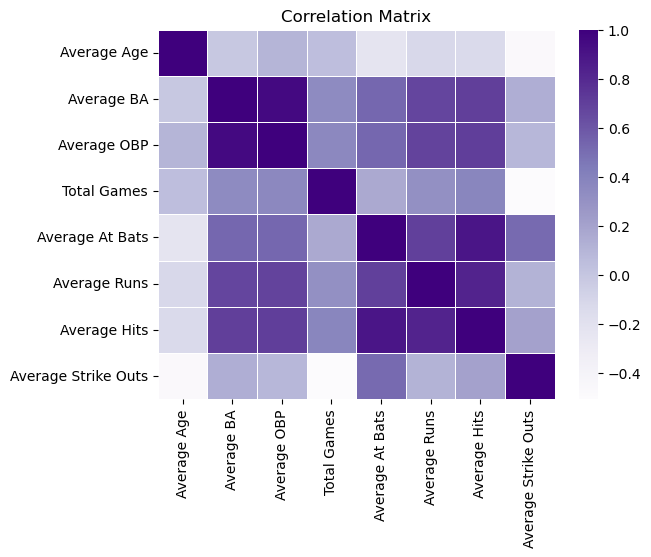

<Figure size 1000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [143]:
correlation_matrix=sb.heatmap(corr_batting.corr("pearson"), 
                              cmap="Purples",
                              linewidths=.7
                              )

plt.title("Correlation Matrix")
plt.figure(figsize=(10, 10))
batting_fig5=plt.gcf()
figs.append(batting_fig5)

plt.show()
plt.savefig("../Test_files/Batting_Figures/Batting Correlation Matrix.png")